# Calories Burnt Prediction

* __Importing Libraries__ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

* __Importing Dataset__

In [2]:
calories = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Imarticus\Calories Burnt Prediction\calories.csv")
exercise = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Imarticus\Calories Burnt Prediction\exercise.csv")

* __Analyzing Data__

In [3]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [4]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [5]:
calories.tail()

User_ID  Calories
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

In [6]:
exercise.tail()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

In [7]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [8]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [9]:
calories.shape

(15000, 2)

In [10]:
exercise.shape

(15000, 8)

In [11]:
calories.describe()

User_ID      Calories
count  1.500000e+04  15000.000000
mean   1.497736e+07     89.539533
std    2.872851e+06     62.456978
min    1.000116e+07      1.000000
25%    1.247419e+07     35.000000
50%    1.499728e+07     79.000000
75%    1.744928e+07    138.000000
max    1.999965e+07    314.000000

In [12]:
exercise.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  
mean      95.518533     40.025453  
std        9.583328      0.779230  
min       67.000000     37.100000  
25%       88.000000     39.600000  
50%       96.000000     40.200000  
75%      103.000000     40.600000  
max      128.000000     41.500000

In [13]:
exercise.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

* __Merging both dataframes on 'User_ID' column__

In [14]:
workout = pd.merge(exercise, calories, on ='User_ID')
workout.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

* __Checking null values__

In [15]:
workout.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

* __Identify and Treatment of Outliers__

<Axes: >

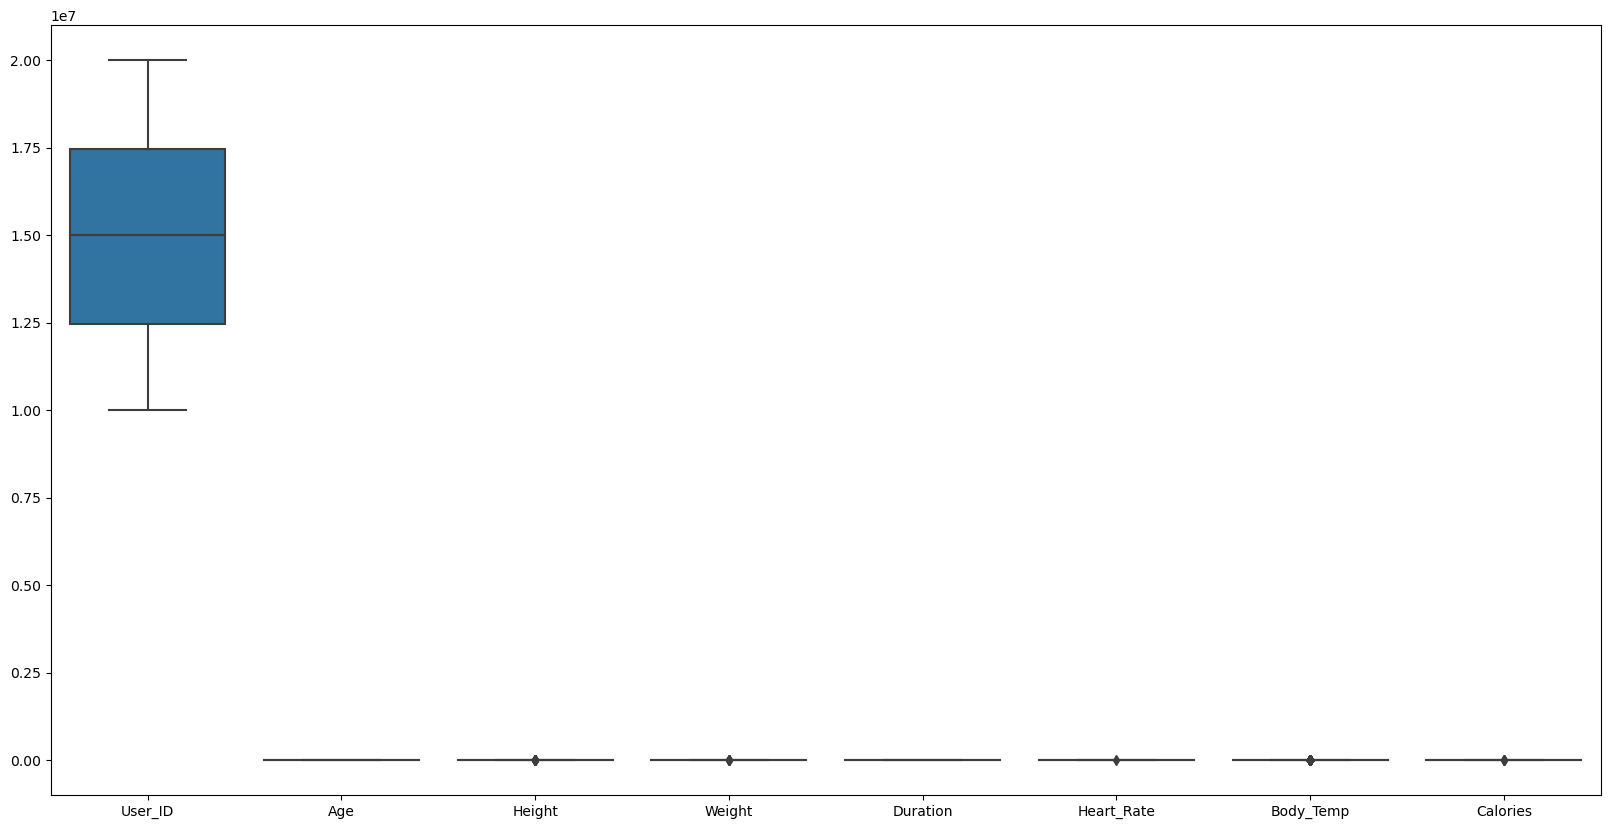

In [16]:
sns.boxplot(data = workout)

<Axes: ylabel='Height'>

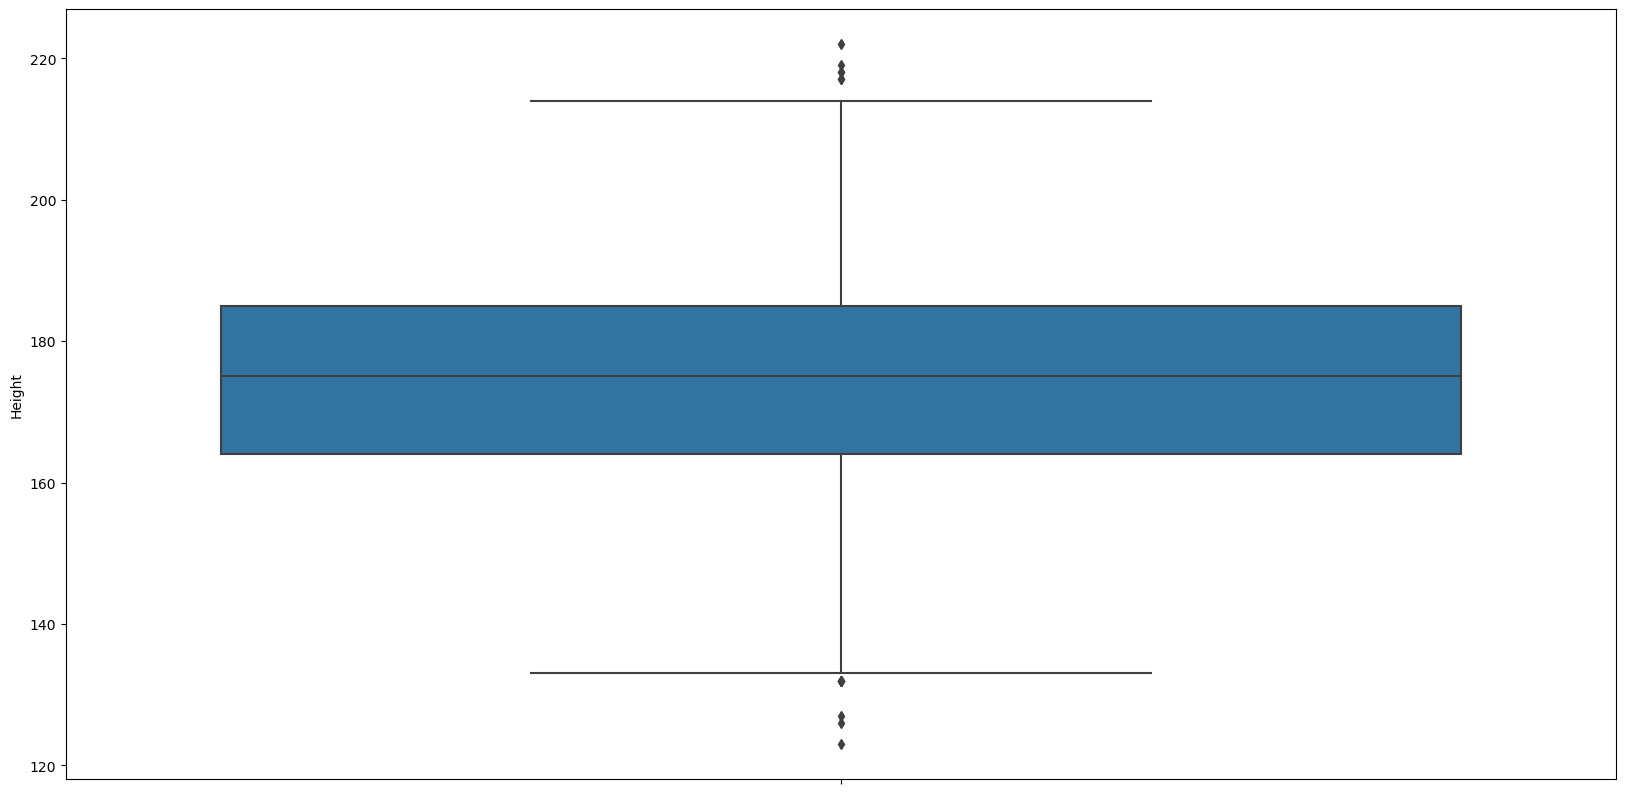

In [17]:
sns.boxplot(y='Height', data=workout)

<Axes: ylabel='Weight'>

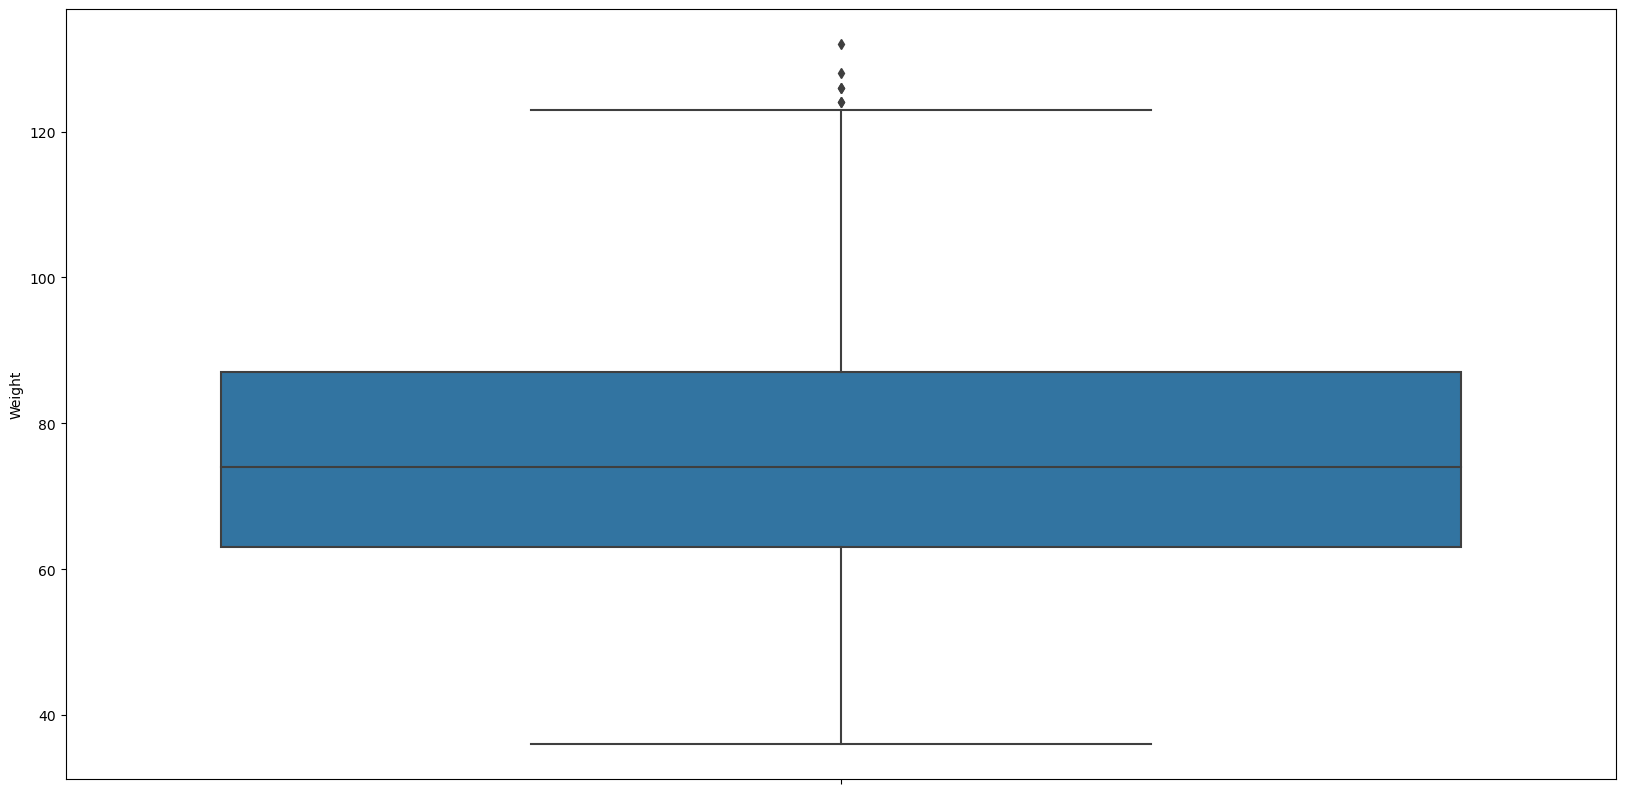

In [18]:
sns.boxplot(y='Weight', data=workout)

<Axes: ylabel='Heart_Rate'>

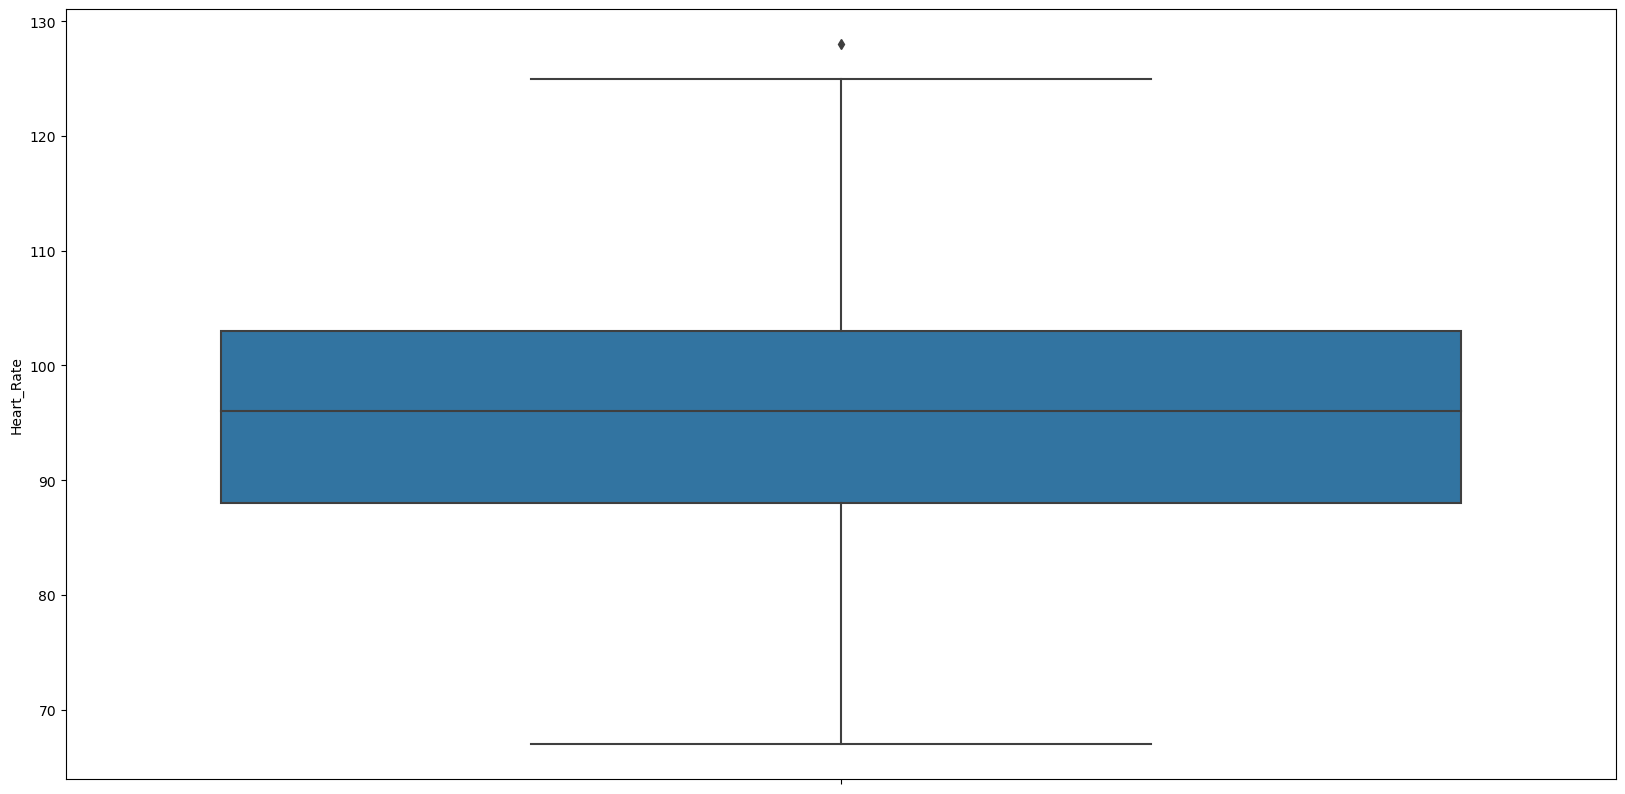

In [19]:
sns.boxplot(y='Heart_Rate', data=workout)

<Axes: ylabel='Body_Temp'>

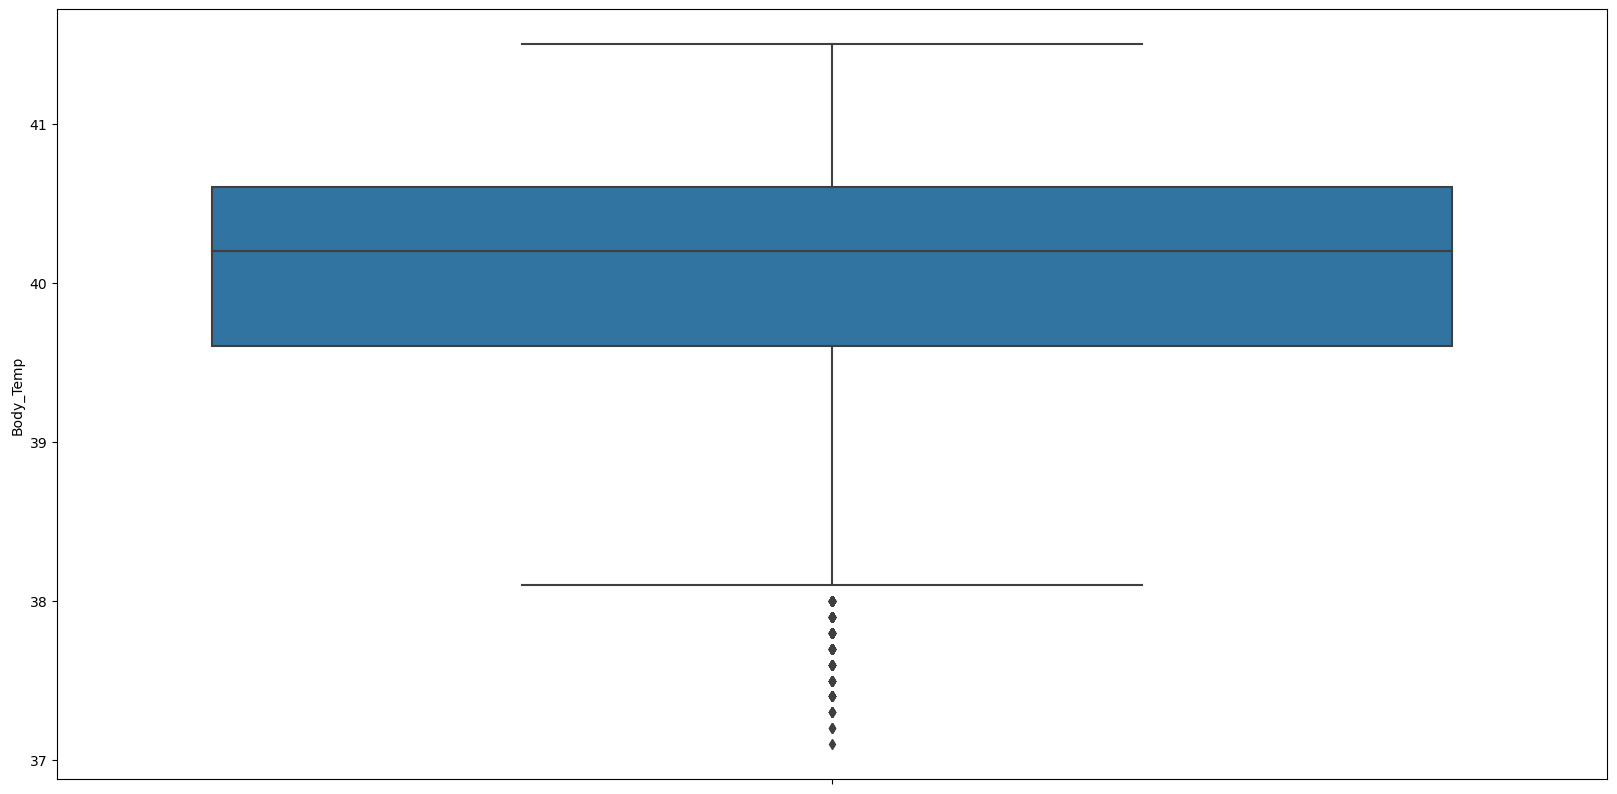

In [20]:
sns.boxplot(y='Body_Temp', data=workout)

In [21]:
for i in workout:                  # i = column name 
    if workout[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = workout[i].quantile(0.25)  # for 1 column compute q1
        q3 = workout[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        workout[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

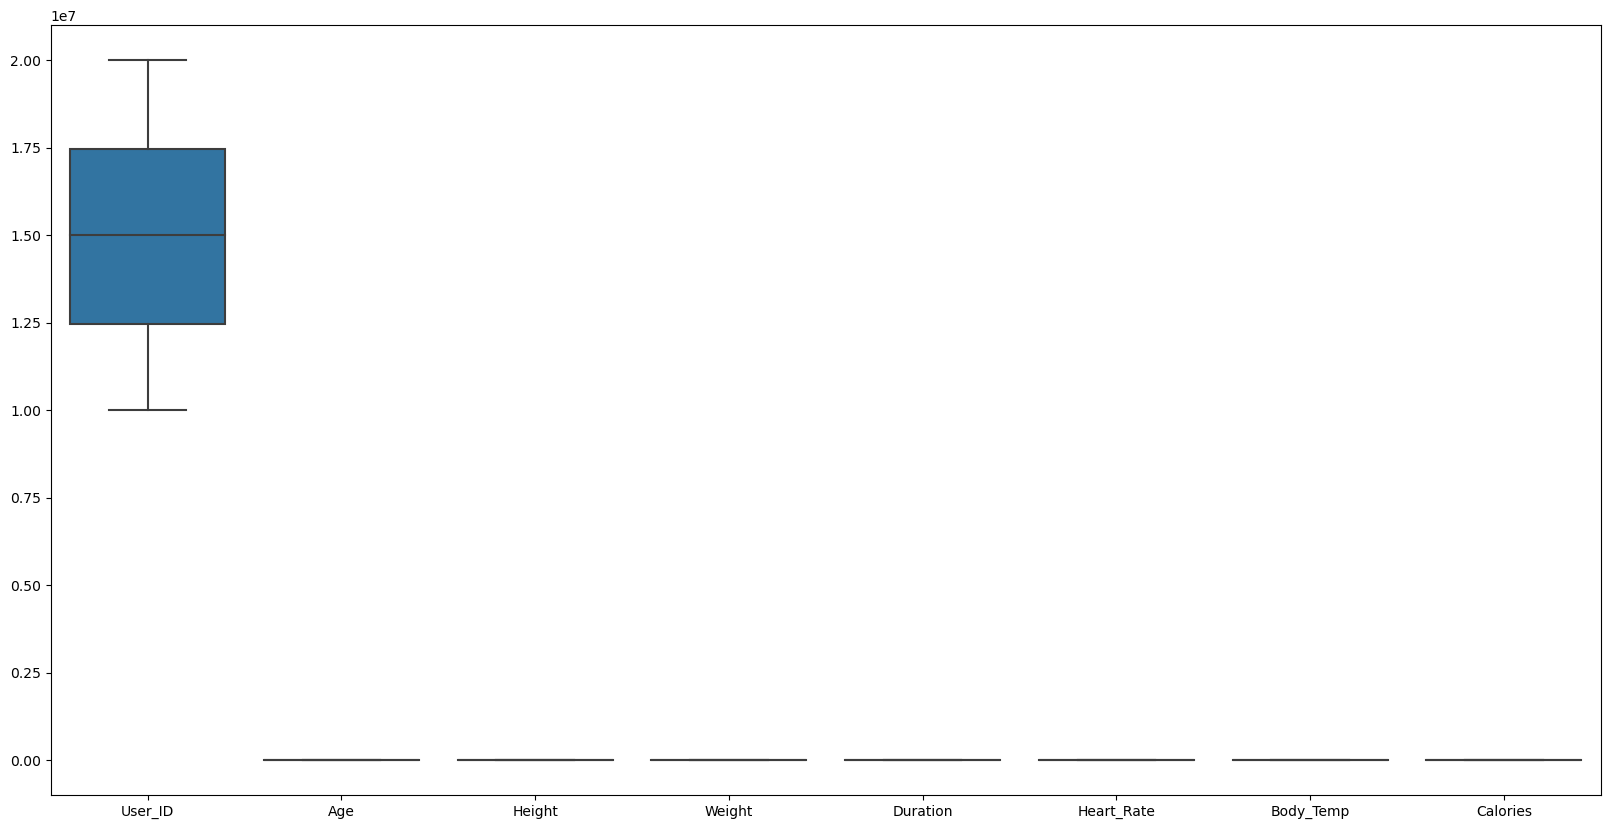

In [22]:
sns.boxplot(data = workout)

<Axes: ylabel='Height'>

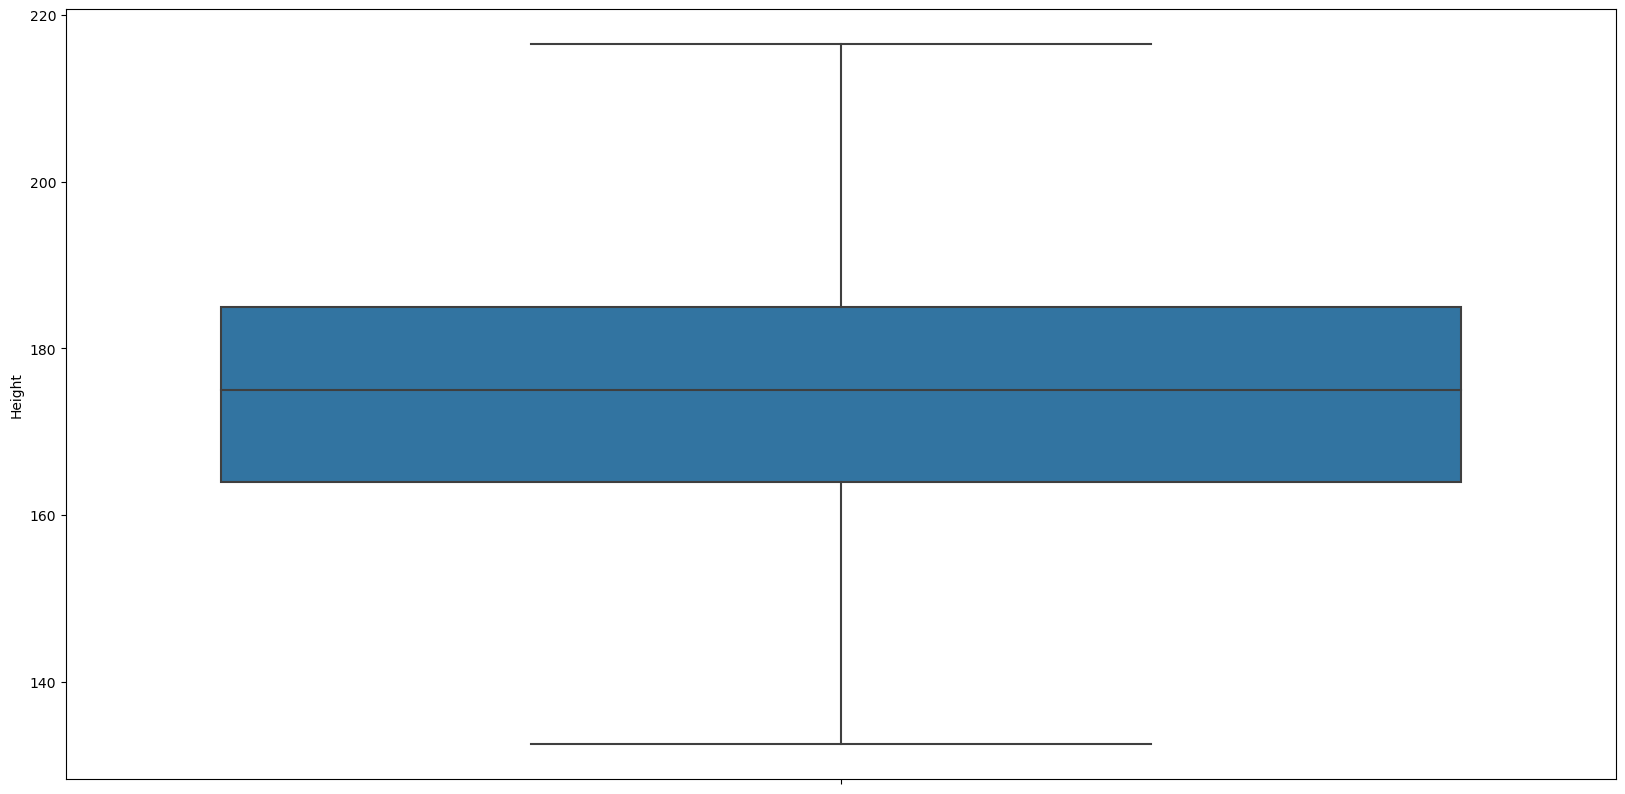

In [23]:
sns.boxplot(y='Height', data=workout)

<Axes: ylabel='Weight'>

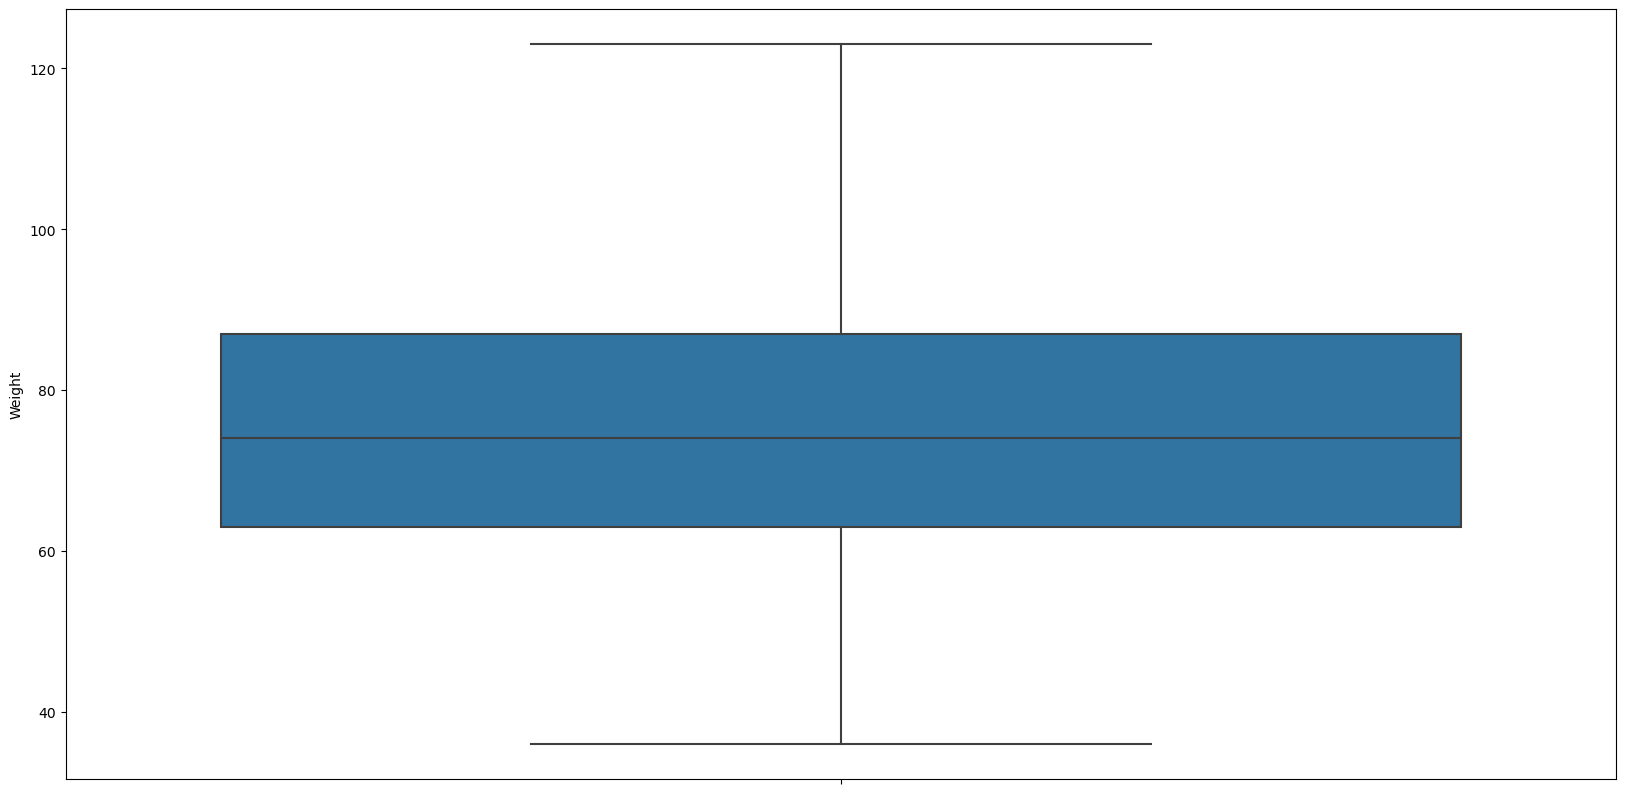

In [24]:
sns.boxplot(y='Weight', data=workout)

<Axes: ylabel='Heart_Rate'>

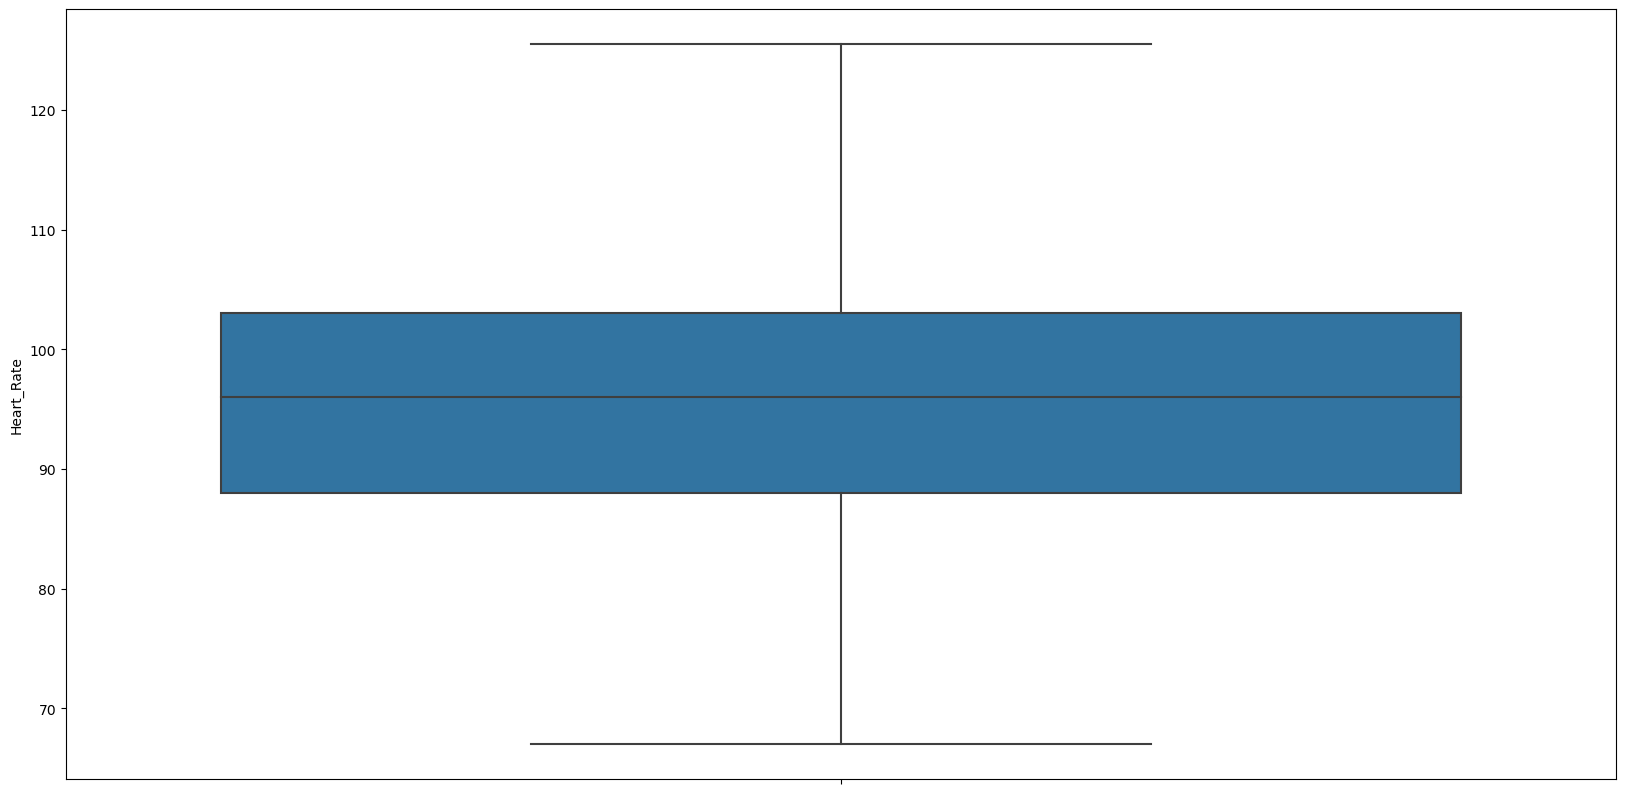

In [25]:
sns.boxplot(y='Heart_Rate', data=workout)

<Axes: ylabel='Body_Temp'>

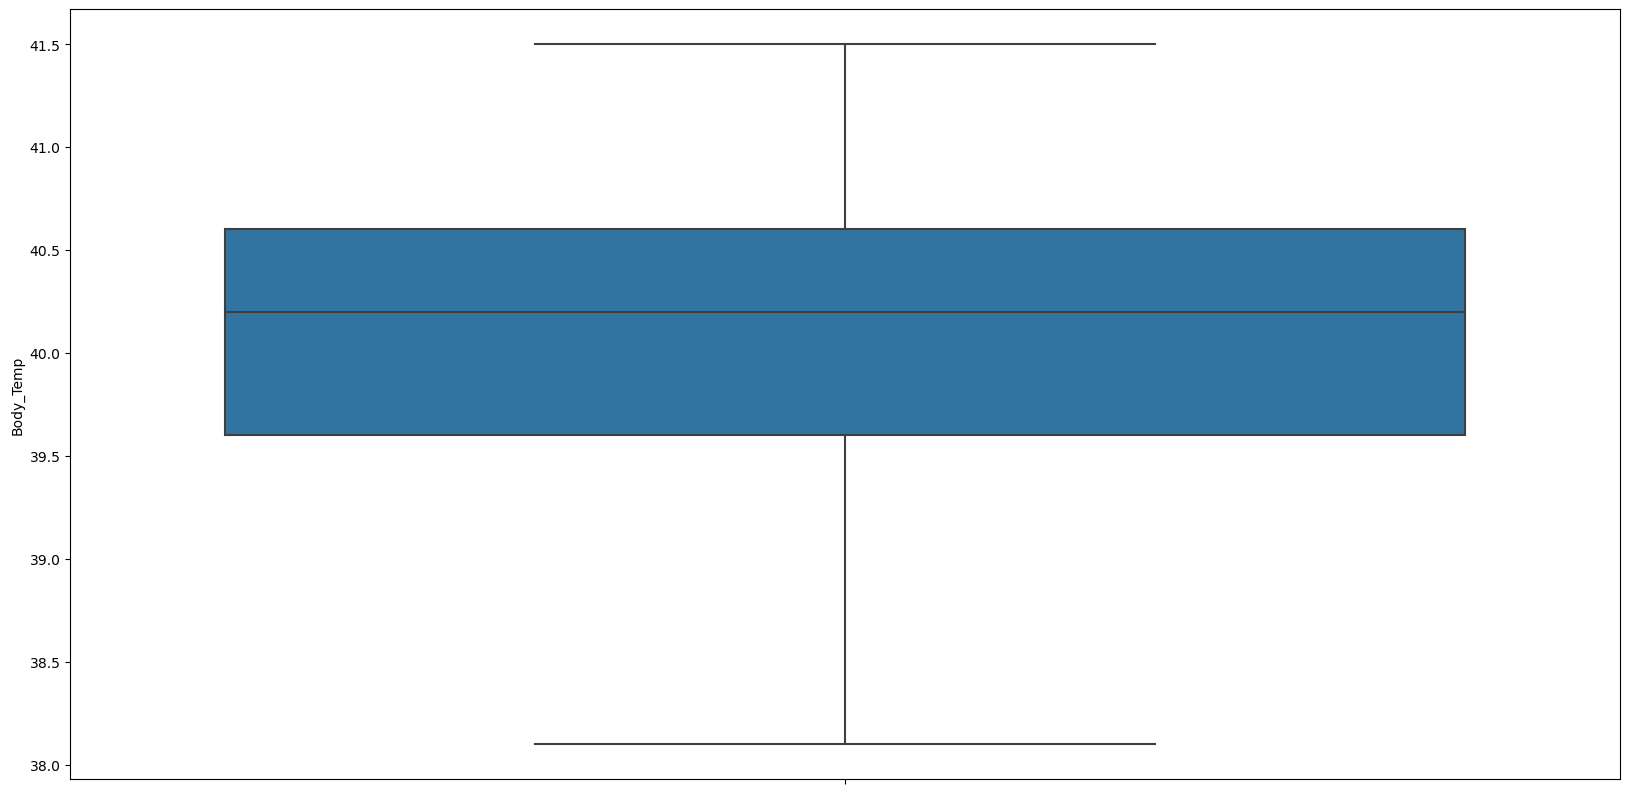

In [26]:
sns.boxplot(y='Body_Temp', data=workout)

* __Removing Unmwanted Column__

In [27]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [28]:
workout.drop(['User_ID'],axis = 1, inplace= True)

In [29]:
workout.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0

In [30]:
workout.describe()

Age        Height        Weight      Duration    Heart_Rate  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      42.789800    174.465933     74.965400     15.530600     95.518367   
std       16.980264     14.250563     15.030691      8.319203      9.582785   
min       20.000000    132.500000     36.000000      1.000000     67.000000   
25%       28.000000    164.000000     63.000000      8.000000     88.000000   
50%       39.000000    175.000000     74.000000     16.000000     96.000000   
75%       56.000000    185.000000     87.000000     23.000000    103.000000   
max       79.000000    216.500000    123.000000     30.000000    125.500000   

          Body_Temp      Calories  
count  15000.000000  15000.000000  
mean      40.033207     89.537267  
std        0.757570     62.449328  
min       38.100000      1.000000  
25%       39.600000     35.000000  
50%       40.200000     79.000000  
75%       40.600000    138.000000  
max       41.500000    292.500000

* __Data Visualization__

Gender Distribution

In [31]:
import plotly.express as px

fig = px.pie(workout,names='Gender')
fig.show()

Age Distribution

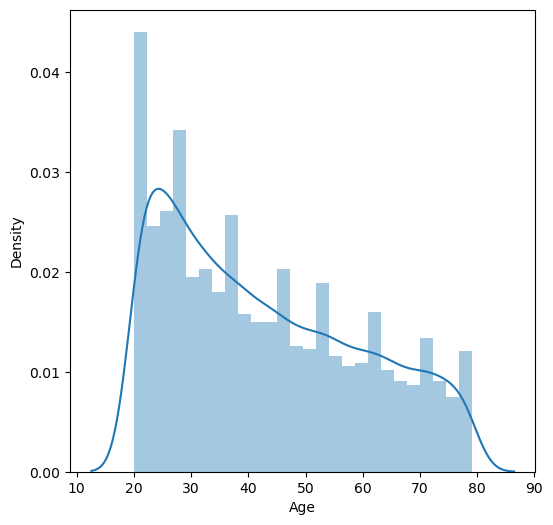

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Age'])
plt.show()

Height Distribution

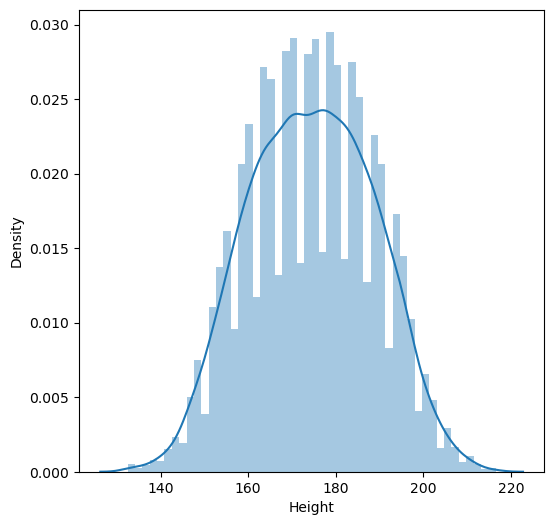

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Height'])
plt.show()

Weight Distribition

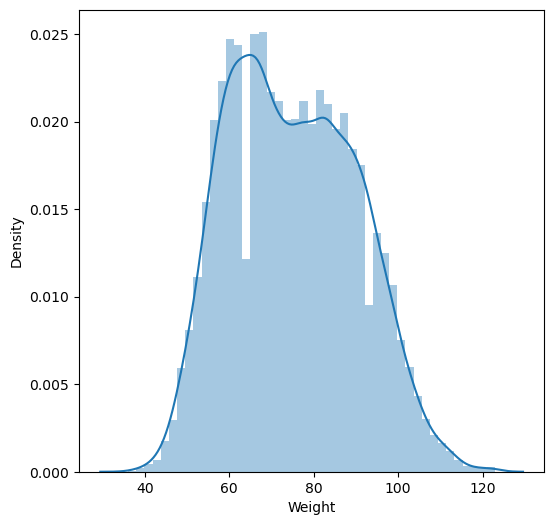

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Weight'])
plt.show()

Duration Distribution

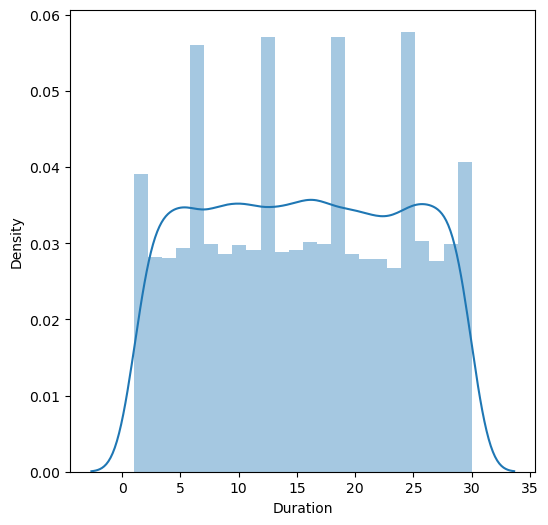

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Duration'])
plt.show()

Heart Rate Distribution

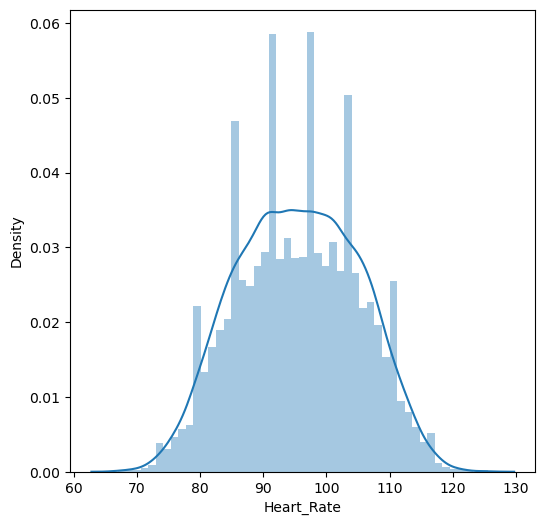

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Heart_Rate'])
plt.show()

Body Temperature Distribution

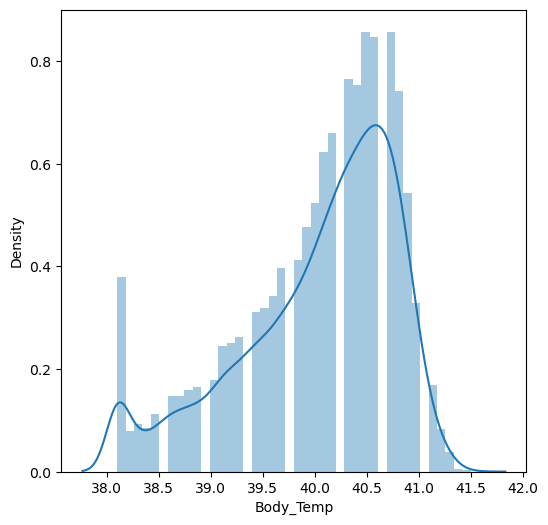

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Body_Temp'])
plt.show()

* __Visualising All Numeric Variable__

<Figure size 600x1200 with 0 Axes>

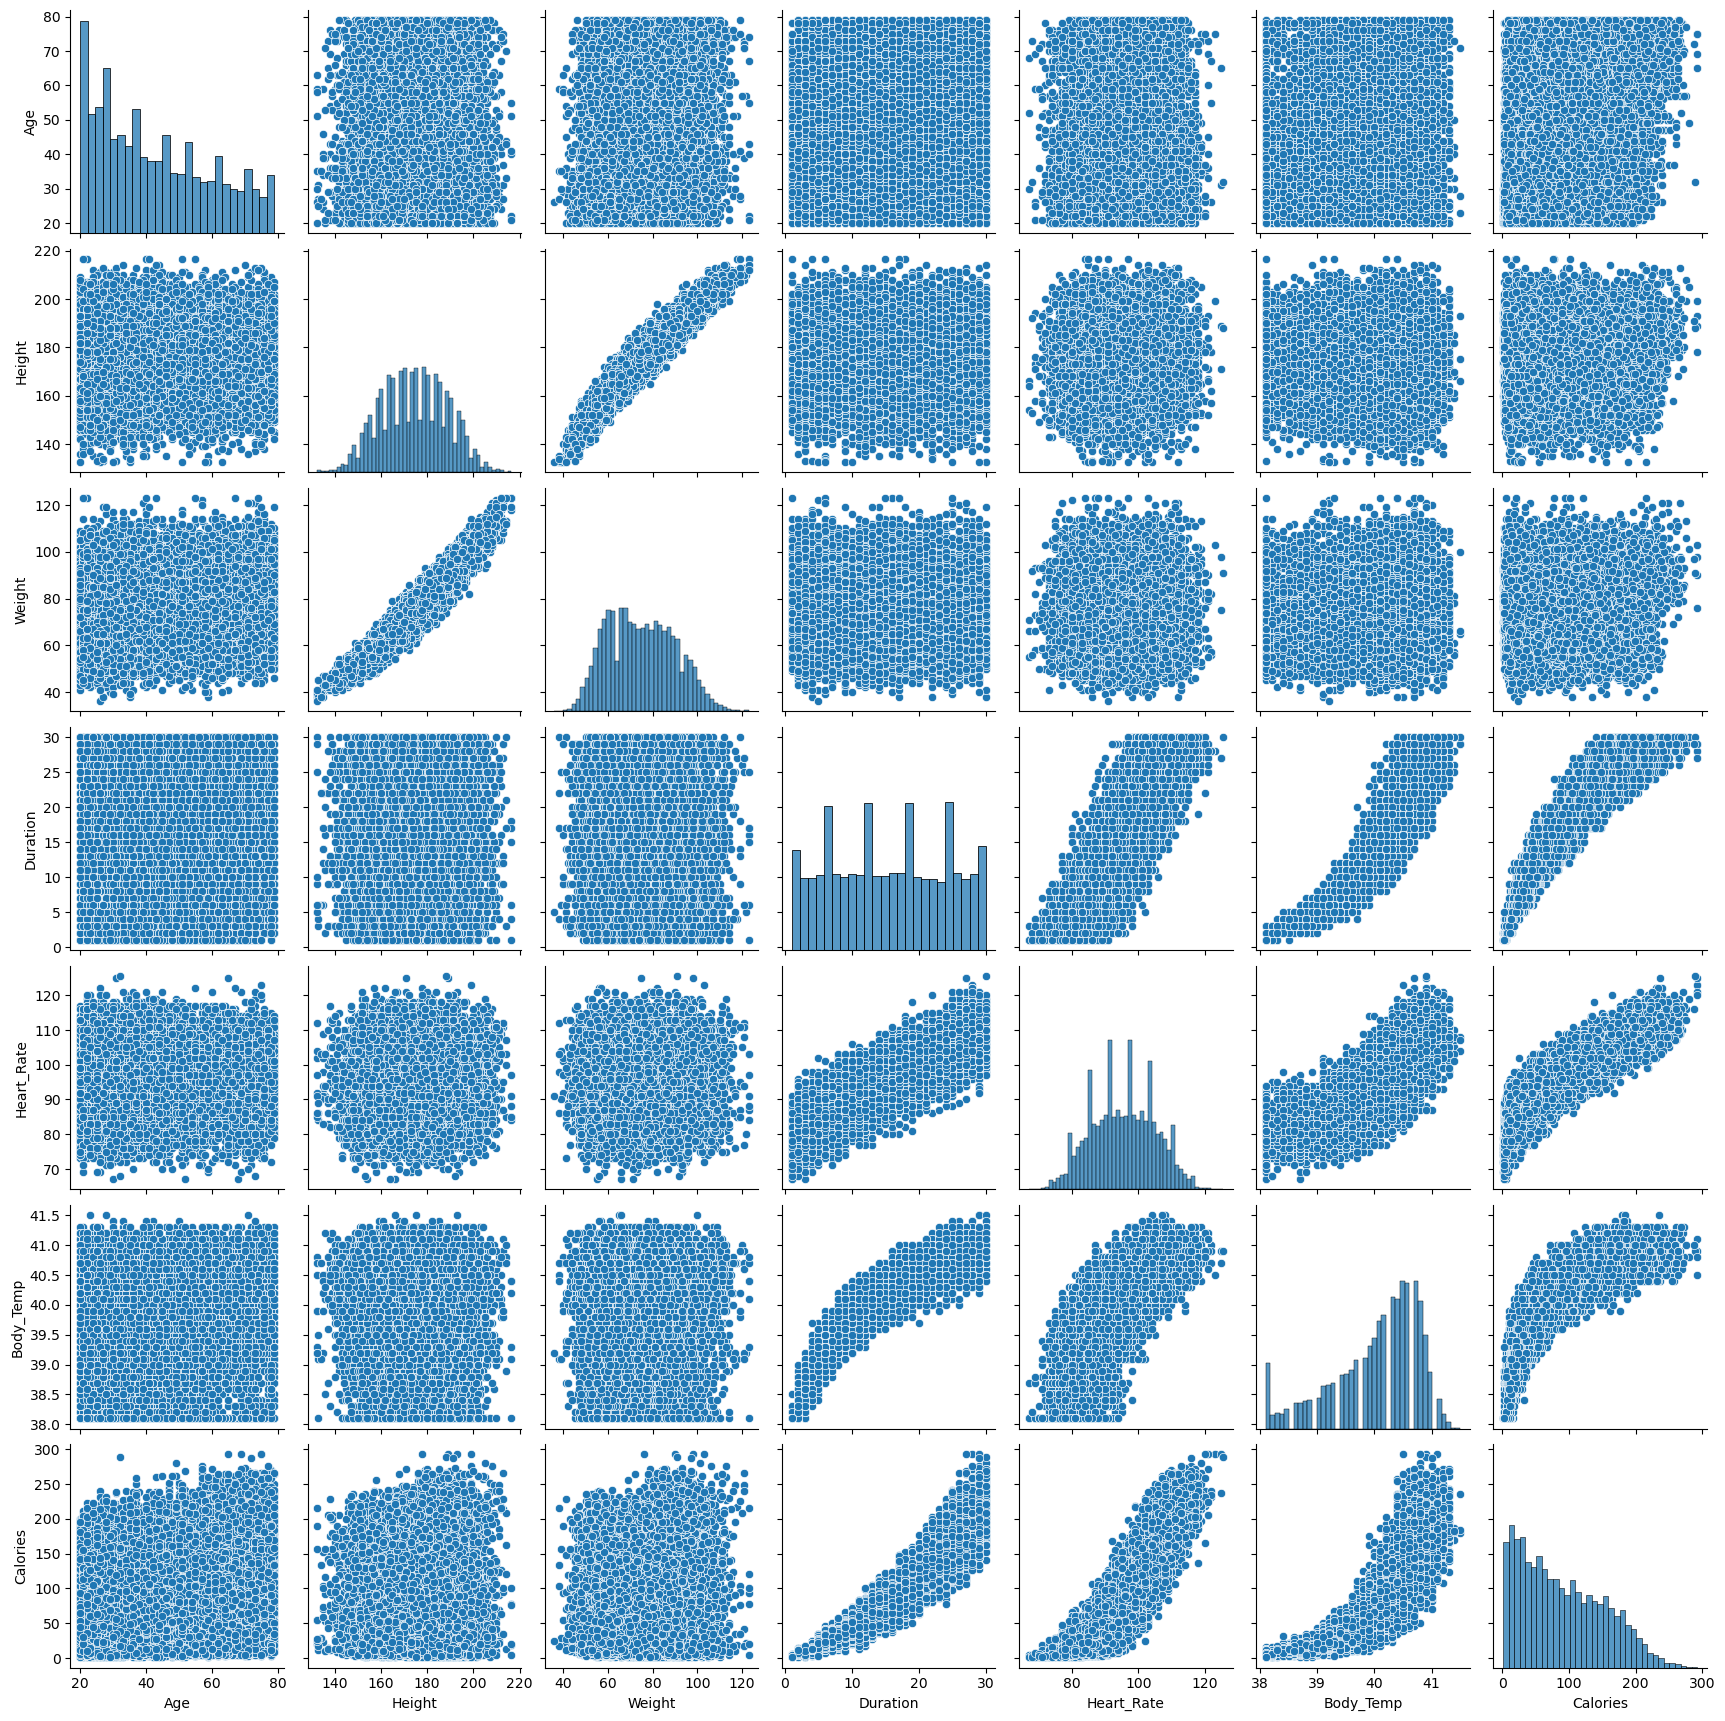

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,12))
sns.pairplot(workout)
plt.show()

* __Encode Categorical Data__

In [39]:
from sklearn.preprocessing import LabelEncoder
for col in workout.columns:
    if workout[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(workout[col].values))
        workout[col]=lbl.transform(workout[col].values)

In [40]:
workout.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       1   68   190.0    94.0      29.0       105.0       40.8     231.0
1       0   20   166.0    60.0      14.0        94.0       40.3      66.0
2       1   69   179.0    79.0       5.0        88.0       38.7      26.0
3       0   34   179.0    71.0      13.0       100.0       40.5      71.0
4       0   27   154.0    58.0      10.0        81.0       39.8      35.0

In [41]:
workout.Gender.value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

* __Correaltion__

In [42]:
correlation = workout.corr()
correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

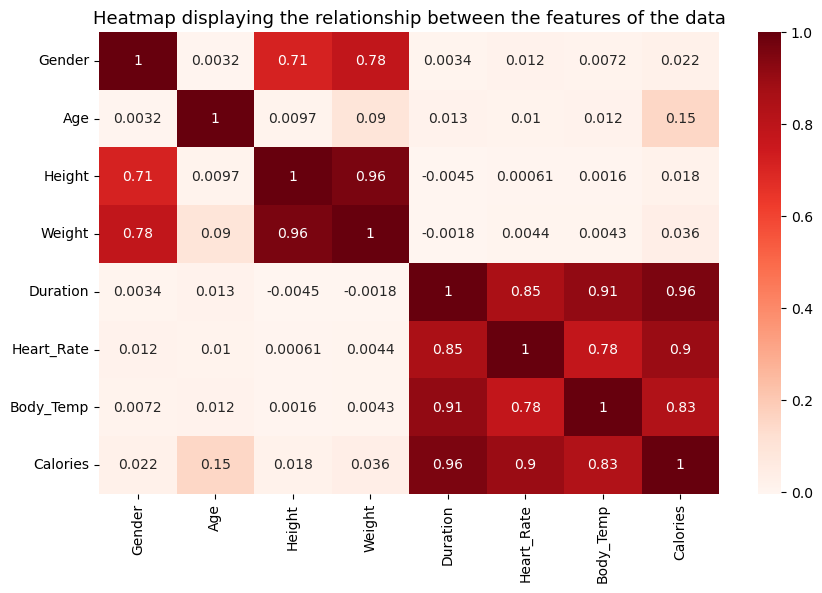

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(workout.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

* __Train Test Split__

In [44]:
x=workout.drop('Calories',axis=1)
y=workout['Calories']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* __Model Training and Testing__

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [48]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgbr = XGBRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

__Linear Regression__

* __Testing with Linear Regression__

In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.9691255568897029

__KNN__

* __Testing with KNN__

In [50]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.9937515549525736

__Decision Tree__

* __Testing with Decision Tree__ 

In [51]:
dt = DecisionTreeRegressor(max_depth = 2)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.8773203377436386

__Random Forest__

* __Testing with Random Forest__

In [52]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.9365605006152432

__AdaBoost__

* __Testing with AdaBoost__

In [53]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.9360889556535978

__Gradiant Boosting__

* __Testing with GradientBoosting__

In [54]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate =.9)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.9980803936415062

__XG Boost__

* __Testing with XGBoost__

In [55]:
xgbr = XGBRegressor() #max_depth=2, n_estimators=100, learning_rate =.2

xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)
from sklearn.metrics import r2_score
r7 = r2_score(y_test,y_pred)
r7

0.9988358947349492

* __Model Result__

In [56]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting','Xgboost'], 
                 'R Square': [r1, r2, r3,r4,r5,r6,r7]}
metrics= pd.DataFrame(metric_results)
metrics

Model  R Square
0  linear Regression  0.969126
1         KNeighbors  0.993752
2      Decision Tree  0.877320
3       RandomForest  0.936561
4           AdaBoost  0.936089
5   GradientBoosting  0.998080
6            Xgboost  0.998836

* __Ploting Result__

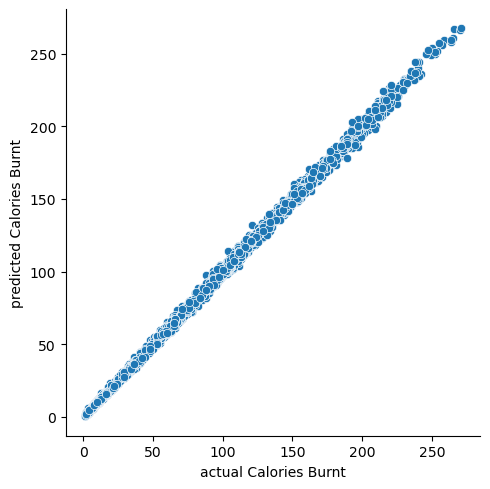

In [57]:
prediction= pd.DataFrame({'actual Calories Burnt': y_test, 'predicted Calories Burnt': y_pred})
sns.relplot(data=prediction, x='actual Calories Burnt', y='predicted Calories Burnt')

In [58]:
import pickle

pickle.dump(knn, open("calories.pkl", "wb"))  # here wb means write binary

model = pickle.load(open("calories.pkl", "rb"))  # here wb means read binary

In [59]:
value = (model.predict(np.array([[1, 68, 190.0, 94.0, 29.0, 105.0, 40.8]])))
round(value[0],2)

247.05

In [60]:
value = (model.predict(np.array([[0, 20, 166.0, 60.0, 14.0, 94.0, 40.3]])))
round(value[0],2)

242.5